# First try at classifying low-resolution hand-written digits

In [0]:
from sklearn import datasets, model_selection, linear_model, neural_network

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# First we load the data
mnist = datasets.load_digits()
X,y=mnist.images,mnist.target
X = X.reshape(len(X),-1)

This digit is a 8


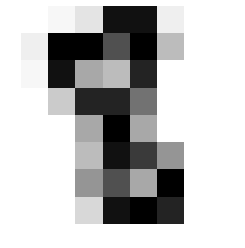

This digit is a 9


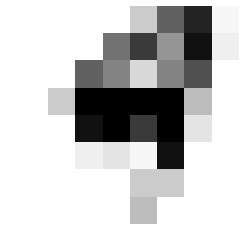

This digit is a 0


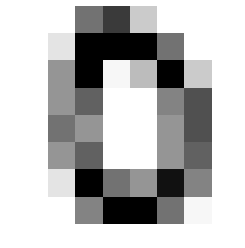

This digit is a 0


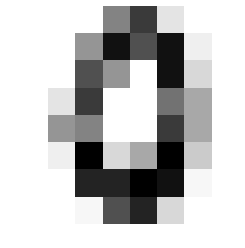

This digit is a 5


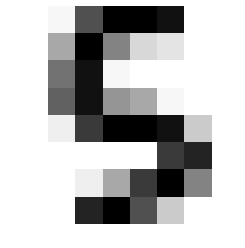

This digit is a 6


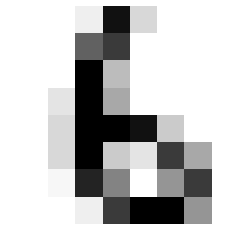

This digit is a 4


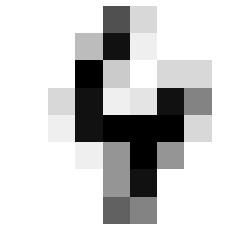

This digit is a 3


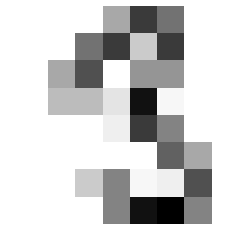

This digit is a 5


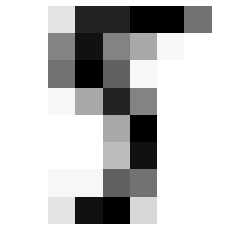

This digit is a 6


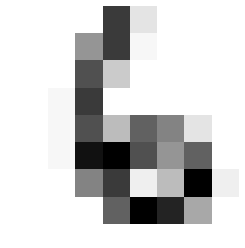

In [0]:
# Let's see what the data looks like
for idx in np.random.random(10)*len(X):
  print("This digit is a %d"%y[int(idx)])
  plt.imshow(mnist.images[int(idx)],"Greys")
  plt.axis('off')
  plt.show()

It looks like we are dealing with low resolution digits. They are not very easy to classify by eye, but the computer should do an okay job!

In [0]:
# We now normalize the data
X = (X-X.min())/(X.max()-X.min())
# and split the data in a train and test set with predefined size (test_size = 0.2) and small )
x_tr, x_te, y_tr, y_te = model_selection.train_test_split(X,y, test_size=0.2)

In [0]:
# and we learn a logistic regression model
clf = linear_model.LogisticRegression()
clf.fit(x_tr,y_tr)
clf.score(x_te,y_te)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9666666666666667

That's a pretty good score already. How did it do that?

0


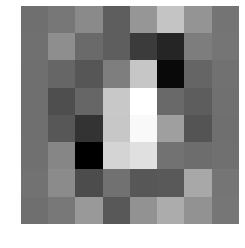

1


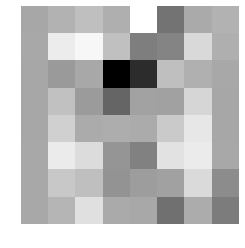

2


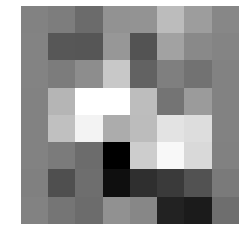

3


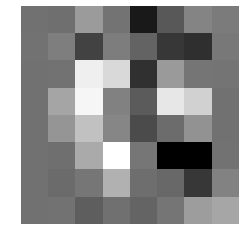

4


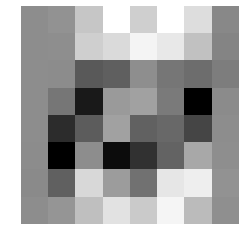

5


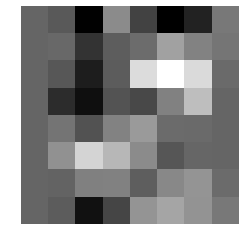

6


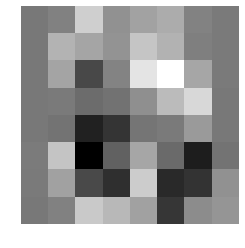

7


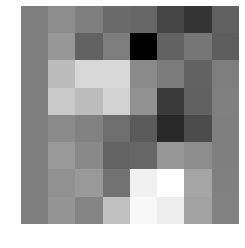

8


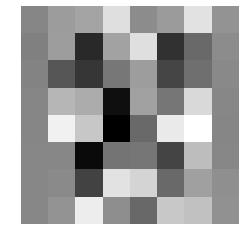

9


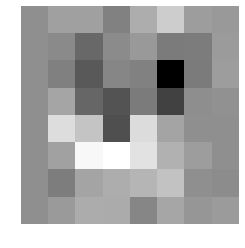

In [0]:
# Let us plot all the learned coefficients
for i,weights in enumerate(clf.coef_):
  print(i)
  plt.imshow(weights.reshape(8,8),"Greys")
  plt.axis('off')
  plt.show()

The classifier picks up on statistical features that allow one to differentiate the data.

Something that we can see from here is that the left and right edges are a uniform color, which means the network does not use this information to classify digits

In [0]:
# If we want to see how the classification is done, we will have to do the matrix multiplication ourselves
np.dot(X_te[0],clf.coef_.T)

array([ -77.22146832,   -6.73159216, -168.33882295, -241.25599293,
         63.48557868,  -90.06085695,  -52.8194868 ,  -73.77222187,
        -50.46181084,  -94.14947221])

In [0]:
# The index with the highest number is 4, so the classifier predicts 4
clf.predict(X_te[0].reshape(1,-1))

array([4])

In [0]:
# Now let's try this with a neural network
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10,),activation='identity',alpha=0.01,max_iter=1000)
mlp.fit(x_tr,y_tr)

train_score = mlp.score(x_tr, y_tr)
test_score = mlp.score(x_te, y_te)

print("Training score:", train_score)
print("Validation score:", test_score)

Training score: 1.0
Validation score: 0.9694444444444444


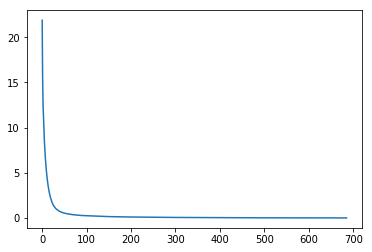

In [0]:
# This is a bit worse, why is that? It can be due to a variety of reasons
# First, let's plot the loss function to see if something went wrong
plt.plot(mlp.loss_curve_)

That looks fine, although we might have learned for too long (could case overfitting). Let us play with hyperparameters to see if there is anything that we can obviously do better

In [0]:
# Play with the hyperparameters and try to get this a bit better
# Some hyperparameters that one could tune
# - number of neurons and hidden layer via hidden_layer_sizes(,)
# - activation function
# - regularization rate via alpha
# - number of iterations via max_iter

**Exercise:** Play with the hyperparameters and try to get this a bit better. Some hyperparameters that one could tune
1.   number of neurons and hidden layer via hidden_layer_sizes(,)
2.   activation function
3.   regularization rate via alpha
4.   number of iterations via max_iter

There exist standardized ways for this (GridSearchCV) but that is more advanced